In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import style
import matplotlib.colors
import shutil
import os
import operator
import warnings
from math import comb
from datetime import datetime
import pytz
from requests_html import AsyncHTMLSession
from collections import defaultdict
import nest_asyncio
from datetime import date
import unicodedata
import random
from matplotlib.ticker import MaxNLocator

warnings.filterwarnings("ignore")
matplotlib.rcParams['figure.facecolor'] = 'w'
matplotlib.rcParams['savefig.facecolor'] = 'w'

In [2]:
multiply_by_number = 1000 # To show the values better (no mathematicians)

In [3]:
def strip_accents(text):
    try:
        text = unicode(text, 'utf-8')
    except NameError: # unicode is a default on python 3 
        pass

    text = unicodedata.normalize('NFD', text)\
           .encode('ascii', 'ignore')\
           .decode("utf-8")

    return str(text)

In [4]:
outdir = './analysis/'
outpath = outdir + 'players/'

if os.path.exists(outpath):
    shutil.rmtree(outpath)

if not os.path.exists(outpath):
    os.makedirs(outpath)

outdir1 = './players_html/'

if os.path.exists(outdir1):
    shutil.rmtree(outdir1)

if not os.path.exists(outdir1):
    os.makedirs(outdir1)

outpath_teams = outdir + 'teams/'

if os.path.exists(outpath_teams):
    shutil.rmtree(outpath_teams)

if not os.path.exists(outpath_teams):
    os.makedirs(outpath_teams)

outdir2 = './teams_html/'

if os.path.exists(outdir2):
    shutil.rmtree(outdir2)

if not os.path.exists(outdir2):
    os.makedirs(outdir2)

### Possible combinations

The number of possible combinations to put $k$ coins on $n$ squadre, allowing only a maximum of $c$ per team is given by

\begin{equation}
\sum_{i = 0}^n {n \choose i} (-1)^{i} {n-1+k-i(c+1) \choose n-1}
\end{equation}

In our case, $k=10$, $n=32$, $c=4$, and therefore

In [5]:
k = 10
n = 32
c = 4
possible_combinations = 0

for i in range(n):
    if (n-1+k-i*(c+1)) <= 0:
        continue
    possible_combinations += comb(n,i) * comb(n-1+k-i*(c+1),n-1) * (-1)**i
    
print("Possible combinations: %s" %(possible_combinations))

Possible combinations: 1109036160


In [6]:
countries = ['ARGENTINA', 'AUSTRALIA', 'BELGIUM', 'BRAZIL', 'CAMEROON',
'CANADA', 'COSTA RICA', 'CROATIA', 'DENMARK', 'ECUADOR', 'ENGLAND',
'FRANCE', 'GERMANY', 'GHANA', 'IR IRAN', 'JAPAN', 'MEXICO', 'MOROCCO',
'NETHERLANDS', 'POLAND', 'PORTUGAL', 'QATAR', 'SAUDI ARABIA',
'SENEGAL', 'SERBIA', 'KOREA REPUBLIC', 'SPAIN', 'SWITZERLAND','TUNISIA', 'USA', 'URUGUAY', 'WALES']
countries = np.array(countries)

### Results

In [7]:
cmap = plt.get_cmap("tab10")

In [8]:
teams = ['Qatar', 'Ecuador', 'Senegal', 'Netherlands', 'England', 'Iran', 'USA', 'Wales', 'Argentina', 'Saudi Arabia', 'Mexico', 'Poland', 'France', 'Australia', 'Denmark', 'Tunisia', 'Spain', 'Costa Rica', 'Germany', 'Japan', 'Belgium', 'Canada', 'Morocco', 'Croatia', 'Brazil', 'Serbia', 'Switzerland', 'Cameroon', 'Portugal', 'Ghana', 'Uruguay', 'South Korea']
teams.sort()
teams = list(map(str.upper,teams))
teams = np.array(teams)
teams

array(['ARGENTINA', 'AUSTRALIA', 'BELGIUM', 'BRAZIL', 'CAMEROON',
       'CANADA', 'COSTA RICA', 'CROATIA', 'DENMARK', 'ECUADOR', 'ENGLAND',
       'FRANCE', 'GERMANY', 'GHANA', 'IRAN', 'JAPAN', 'MEXICO', 'MOROCCO',
       'NETHERLANDS', 'POLAND', 'PORTUGAL', 'QATAR', 'SAUDI ARABIA',
       'SENEGAL', 'SERBIA', 'SOUTH KOREA', 'SPAIN', 'SWITZERLAND',
       'TUNISIA', 'USA', 'URUGUAY', 'WALES'], dtype='<U12')

In [9]:
users = pd.read_csv('users.csv')
users = users.iloc[: , :]

players = users['name'].tolist()

users.head(5)

,Unnamed: 0,money,name,share1,share10,share2,share3,share4,share5,share6,share7,share8,share9
0,0,NO,Player 1,ARGENTINA,SERBIA,PORTUGAL,GERMANY,SERBIA,BRAZIL,BELGIUM,FRANCE,ARGENTINA,PORTUGAL
1,1,YES,Player 2,ARGENTINA,ENGLAND,ARGENTINA,CROATIA,MEXICO,USA,SERBIA,PORTUGAL,FRANCE,AUSTRALIA
2,2,NO,Player 3,SPAIN,BRAZIL,SPAIN,SPAIN,SPAIN,NETHERLANDS,NETHERLANDS,BRAZIL,SOUTH KOREA,WALES
3,3,YES,Player 4,SENEGAL,DENMARK,WALES,POLAND,SWITZERLAND,GERMANY,BELGIUM,BELGIUM,SERBIA,POLAND
4,4,YES,Player 5,ENGLAND,SPAIN,ENGLAND,FRANCE,FRANCE,FRANCE,ENGLAND,SPAIN,SPAIN,SPAIN


In [10]:
shares = []

for index, row in users.iterrows():
    shares_player = np.zeros(len(teams))
    for share in range(1,11):
        shares_player[np.argwhere(teams == row['share' + str(share)]).item()] += 1
    shares.append(shares_player.tolist())

shares = np.array(shares).T
shares.shape

(32, 109)

In [11]:
df = pd.DataFrame(shares, index=teams, columns=players)
df.head(5)

,Player 1,Player 2,Player 3,Player 4,Player 5,Player 6,Player 7,Player 8,Player 9,Player 10,...,Player 100,Player 101,Player 102,Player 103,Player 104,Player 105,Player 106,Player 107,Player 108,Player 109
ARGENTINA,2.0,2.0,0.0,0.0,0.0,0.0,4.0,2.0,0.0,2.0,...,4.0,3.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
AUSTRALIA,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
BELGIUM,1.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,4.0,1.0,...,0.0,0.0,1.0,2.0,2.0,0.0,0.0,0.0,1.0,1.0
BRAZIL,1.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,...,3.0,3.0,1.0,2.0,0.0,1.0,2.0,1.0,3.0,1.0
CAMEROON,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


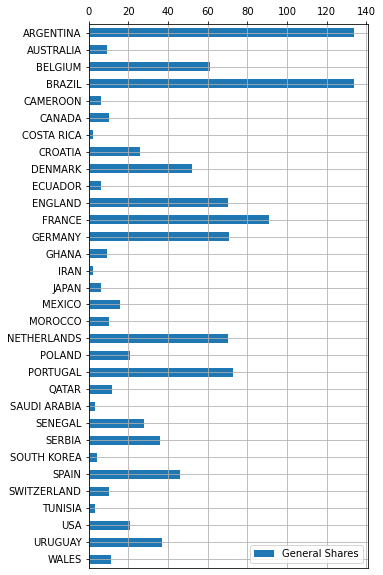

In [12]:
total_shares = np.sum(shares,axis = 1)

data = {'General Shares': total_shares,
       }

fig, ax = plt.subplots(facecolor='white')
df_bar = pd.DataFrame(data,columns=['General Shares'], index = teams)
df_bar.plot.barh(figsize=(5,10),ax = ax)
ax.invert_yaxis()
ax.xaxis.tick_top()
ax.legend(loc = 'lower right')
ax.grid()
plt.savefig(outdir + 'general_shares.png',bbox_inches='tight', dpi=1000)

### Creating html per team

In [13]:
for team in teams:

    players_per_team = []
    players_per_betting_team = []

    for player in sorted(players):

        idx = players.index(player)
        values = shares[:,idx]
        choices = []

        for i,x in enumerate(values):
            if x == 0:
                continue
            for j in range(int(x)):
                if team == teams[i]:
                    players_per_team.append('<a href=\"https://naiimic.github.io/content/fantasyshares_game/players_html/' + ''.join(strip_accents(player).lower().split()) + '_general.html\">' + player + '</a>')

    res = pd.DataFrame(players_per_team, columns = ['<b>Shareholder</b>'])
    res.index += 1
    res.to_csv(outpath_teams + 'tmp_' + ''.join(strip_accents(team).lower().split()) + '_general.csv')

    text = open(outpath_teams + 'tmp_' + ''.join(strip_accents(team).lower().split()) + '_general.csv', "r")
    text = ''.join([i for i in text]).replace('\"<a href=\"\"', '<a href=\"')
    text = ''.join([i for i in text]).replace('\"\">', '\">')
    text = ''.join([i for i in text]).replace('</a>\"', '</a>')
    x = open(outpath_teams + ''.join(strip_accents(team).lower().split()) + '_general.csv',"w")
    x.writelines(text)
    x.close()
    os.remove(outpath_teams + 'tmp_' + ''.join(strip_accents(team).lower().split()) + '_general.csv')

In [14]:
html_dir = './teams_html/'
originalfile = 'teams_template.html'

for team in teams:

    namefile = html_dir + ''.join(strip_accents(team).lower().split()) + '_tmp.html'

    if not os.path.isfile(namefile):
        shutil.copy(originalfile,namefile)
        
        text = open(namefile, "r")
        text = ''.join([i for i in text]).replace('template', ''.join(strip_accents(team).lower().split()) + '_general')
        text = ''.join([i for i in text]).replace('Template', team)
        x = open(namefile[:-9] + "_general.html","w")
        x.writelines(text)
        x.close()

        os.remove(namefile)

### Points

#### Automated web scraper

In [15]:
def compute_points(df_res, *, players = None, total_shares = None, shares = None, print_scores = False):

    teams = ['Qatar', 'Ecuador', 'Senegal', 'Netherlands', 'England', 'Iran', 'USA', 'Wales', 'Argentina', 'Saudi Arabia', 'Mexico', 'Poland', 'France', 'Australia', 'Denmark', 'Tunisia', 'Spain', 'Costa Rica', 'Germany', 'Japan', 'Belgium', 'Canada', 'Morocco', 'Croatia', 'Brazil', 'Serbia', 'Switzerland', 'Cameroon', 'Portugal', 'Ghana', 'Uruguay', 'South Korea']
    teams.sort()
    teams = list(map(str.upper,teams))
    
    eliminated_teams = []
    eliminated_teams.extend(['QATAR', 'ECUADOR', 'WALES', 'IRAN', 'TUNISIA', 'DENMARK', 'MEXICO', 'SAUDI ARABIA', 'BELGIUM', 'CANADA', 'COSTA RICA', 'GERMANY', 'URUGUAY', 'GHANA', 'SERBIA', 'CAMEROON'])
    playoffs_teams = ['NETHERLANDS', 'SENEGAL', 'ENGLAND', 'USA', 'FRANCE', 'AUSTRALIA', 'ARGENTINA', 'POLAND', 'CROATIA', 'MOROCCO', 'SPAIN', 'JAPAN', 'PORTUGAL', 'SOUTH KOREA', 'SWITZERLAND', 'BRAZIL']
    second_teams = ['SENEGAL', 'USA', 'POLAND', 'AUSTRALIA', 'SPAIN', 'CROATIA', 'SWITZERLAND', 'SOUTH KOREA']

    third_place = []
    second_place = []
    first_place = []

    if players != None:
        players_points = np.zeros((len(players),(len(df_res)+1)))
    
    points = np.zeros(len(teams))

    if print_scores:
        f_res = open(outdir + 'scores.txt','w')

    for index, row in df_res.iterrows():

        home_goal = int(row['scores'][0])
        away_goal = int(row['scores'][-1])
        home_team = row['home_teams'].upper()
        away_team = row['away_teams'].upper()

        day = int(row['times'][:2])
        month = int(row['times'][3:5])

        if datetime(2022, month, day) >= datetime(2022, 11, 20) and datetime(2022, month, day) < datetime(2022, 12, 3):

            if print_scores:
                print('Group stage: %s %d - %d %s' %(home_team,home_goal,away_goal,away_team))
                f_res.write("{: ^14} {: <1} - {: <2} {: ^13}\n".format(home_team,home_goal,away_goal,away_team))

            if home_goal > away_goal:
                points[teams.index(home_team)] += 1
            elif home_goal == away_goal:
                points[teams.index(home_team)] += 0.5
                points[teams.index(away_team)] += 0.5
            else:
                points[teams.index(away_team)] += 1

        elif datetime(2022, month, day) >= datetime(2022, 12, 3) and datetime(2022, month, day) < datetime(2022, 12, 7):

            if print_scores:
                print('Round of 16: %s %d - %d %s' %(home_team,home_goal,away_goal,away_team))
                f_res.write("{: ^14} {: <1} - {: <2} {: ^13}\n".format(home_team,home_goal,away_goal,away_team))

            if home_goal > away_goal:
                points[teams.index(home_team)] += 2
                eliminated_teams.append(away_team)
            else:
                points[teams.index(away_team)] += 2
                eliminated_teams.append(home_team)

        elif datetime(2022, month, day) >= datetime(2022, 12, 9) and datetime(2022, month, day) < datetime(2022, 12, 11):

            if print_scores:
                print('Quarter - final: %s %d - %d %s' %(home_team,home_goal,away_goal,away_team))
                f_res.write("{: ^14} {: <1} - {: <2} {: ^13}\n".format(home_team,home_goal,away_goal,away_team))

            if home_goal > away_goal:
                points[teams.index(home_team)] += 4
                eliminated_teams.append(away_team)
            else:
                points[teams.index(away_team)] += 4
                eliminated_teams.append(home_team)

        elif datetime(2022, month, day) >= datetime(2022, 12, 13) and datetime(2022, month, day) < datetime(2022, 12, 15):

            if print_scores:
                print('Semi - final: %s %d - %d %s' %(home_team,home_goal,away_goal,away_team))
                f_res.write("{: ^14} {: <1} - {: <2} {: ^13}\n".format(home_team,home_goal,away_goal,away_team))

            if home_goal > away_goal:
                points[teams.index(home_team)] += 8
            else:
                points[teams.index(away_team)] += 8

        elif datetime(2022, month, day) >= datetime(2022, 12, 17) and datetime(2022, month, day) < datetime(2022, 12, 18):

            if print_scores:
                print('Third-place final: %s %d - %d %s' %(home_team,home_goal,away_goal,away_team))
                f_res.write("{: ^14} {: <1} - {: <2} {: ^13}\n".format(home_team,home_goal,away_goal,away_team))
            
            if home_goal > away_goal:
                points[teams.index(home_team)] += 4
                third_place.append(home_team)
                eliminated_teams.append(away_team)
            else:
                points[teams.index(away_team)] += 4
                third_place.append(away_team)
                eliminated_teams.append(home_team)

        else:

            if print_scores:
                print('Final: %s %d - %d %s' %(home_team,home_goal,away_goal,away_team))
                f_res.write("{: ^14} {: <1} - {: <2} {: ^13}\n".format(home_team,home_goal,away_goal,away_team))

            if home_goal > away_goal:
                points[teams.index(home_team)] += 16
                first_place.append(home_team)
                second_place.append(away_team)
            else:
                points[teams.index(away_team)] += 16
                first_place.append(away_team)
                second_place.append(home_team)

        if index >= 32 and len(playoffs_teams) > 0:
            points[teams.index(playoffs_teams[0])] += 1
            if playoffs_teams[0] in second_teams:
                points[teams.index(playoffs_teams[0])] -= 0.5
            playoffs_teams.pop(0)
                
        if players != None:
            players_points[:,index+1] = list(dict(zip(players,np.nansum(points / total_shares * shares.T,axis=1).round(decimals=3))).values())

    if players != None:
        return points, eliminated_teams, third_place, second_place, first_place, players_points
    else:
        return points, eliminated_teams, third_place, second_place, first_place

In [16]:
teams = ['Qatar', 'Ecuador', 'Senegal', 'Netherlands', 'England', 'Iran', 'USA', 'Wales', 'Argentina', 'Saudi Arabia', 'Mexico', 'Poland', 'France', 'Australia', 'Denmark', 'Tunisia', 'Spain', 'Costa Rica', 'Germany', 'Japan', 'Belgium', 'Canada', 'Morocco', 'Croatia', 'Brazil', 'Serbia', 'Switzerland', 'Cameroon', 'Portugal', 'Ghana', 'Uruguay', 'South Korea']
teams.sort()
teams = list(map(str.upper,teams))

In [17]:
nest_asyncio.apply()
url = 'https://www.flashscore.com/football/world/world-championship/results/'
asession = AsyncHTMLSession()

async def get_scores():
    r = await asession.get(url)
    await r.html.arender(timeout = 30)
    return r

results = asession.run(get_scores)
results = results[0]

times = results.html.find("div.event__time")
home_teams = results.html.find("div.event__participant.event__participant--home")
home_scores = results.html.find("div.event__score.event__score--home")
away_scores = results.html.find("div.event__score.event__score--away")
away_teams = results.html.find("div.event__participant.event__participant--away")
#event_part = results.html.find("div.event__part")

dict_res = defaultdict(list)

for ind in range(len(times)):

    if times[ind].text.split()[0][:2] == '14' and times[ind].text.split()[0][3:5] == '06':
        break

    dict_res['times'].append(times[ind].text.split('\n')[0])
    dict_res['home_teams'].append(home_teams[ind].text.split('\n')[0])
    home_score = home_scores[ind].text.split('\n')[0]
    away_score = away_scores[ind].text.split('\n')[0]
    dict_res['scores'].append(home_score + ' ' + away_score)
    dict_res['away_teams'].append(away_teams[ind].text.split('\n')[0])
    #dict_res['event_part'].append(event_part[ind].text)

df_res = pd.DataFrame(dict_res)
df_res = df_res.iloc[::-1].reset_index(drop=True)
# df_res.loc[len(df_res.index)] = ['14.12. 20:00', 'France', '2 0', 'Morocco']
df_res.tail(5)

,times,home_teams,scores,away_teams
59,10.12. 14:00,England,1 2,France
60,13.12. 14:00,Argentina,3 0,Croatia
61,14.12. 14:00,France,2 0,Morocco
62,17.12. 10:00,Croatia,2 1,Morocco
63,18.12. 10:00,Argentina,4 3,France


In [18]:
points, eliminated_teams, third_place, second_place, first_place, players_points = compute_points(df_res,players=players,total_shares=total_shares,shares=shares,print_scores=True)

Group stage: QATAR 0 - 2 ECUADOR
Group stage: ENGLAND 6 - 2 IRAN
Group stage: SENEGAL 0 - 2 NETHERLANDS
Group stage: USA 1 - 1 WALES
Group stage: ARGENTINA 1 - 2 SAUDI ARABIA
Group stage: DENMARK 0 - 0 TUNISIA
Group stage: MEXICO 0 - 0 POLAND
Group stage: FRANCE 4 - 1 AUSTRALIA
Group stage: MOROCCO 0 - 0 CROATIA
Group stage: GERMANY 1 - 2 JAPAN
Group stage: SPAIN 7 - 0 COSTA RICA
Group stage: BELGIUM 1 - 0 CANADA
Group stage: SWITZERLAND 1 - 0 CAMEROON
Group stage: URUGUAY 0 - 0 SOUTH KOREA
Group stage: PORTUGAL 3 - 2 GHANA
Group stage: BRAZIL 2 - 0 SERBIA
Group stage: WALES 0 - 2 IRAN
Group stage: QATAR 1 - 3 SENEGAL
Group stage: NETHERLANDS 1 - 1 ECUADOR
Group stage: ENGLAND 0 - 0 USA
Group stage: TUNISIA 0 - 1 AUSTRALIA
Group stage: POLAND 2 - 0 SAUDI ARABIA
Group stage: FRANCE 2 - 1 DENMARK
Group stage: ARGENTINA 2 - 0 MEXICO
Group stage: JAPAN 0 - 1 COSTA RICA
Group stage: BELGIUM 0 - 2 MOROCCO
Group stage: CROATIA 4 - 1 CANADA
Group stage: SPAIN 1 - 1 GERMANY
Group stage: CAMEROO

In [19]:
np.array(eliminated_teams)

array(['QATAR', 'ECUADOR', 'WALES', 'IRAN', 'TUNISIA', 'DENMARK',
       'MEXICO', 'SAUDI ARABIA', 'BELGIUM', 'CANADA', 'COSTA RICA',
       'GERMANY', 'URUGUAY', 'GHANA', 'SERBIA', 'CAMEROON', 'USA',
       'AUSTRALIA', 'POLAND', 'SENEGAL', 'JAPAN', 'SOUTH KOREA', 'SPAIN',
       'SWITZERLAND', 'BRAZIL', 'NETHERLANDS', 'PORTUGAL', 'ENGLAND',
       'MOROCCO'], dtype='<U12')

In [20]:
points

array([33. ,  2.5,  1.5,  5. ,  1.5,  0. ,  1. , 12.5,  0.5,  1.5,  5.5,
       17. ,  1.5,  1. ,  1. ,  3. ,  1.5,  9.5,  5.5,  2. ,  5. ,  0. ,
        1. ,  2.5,  0.5,  2. ,  2. ,  2.5,  1.5,  2.5,  1.5,  0.5])

In [21]:
third_place, second_place, first_place

(['CROATIA'], ['FRANCE'], ['ARGENTINA'])

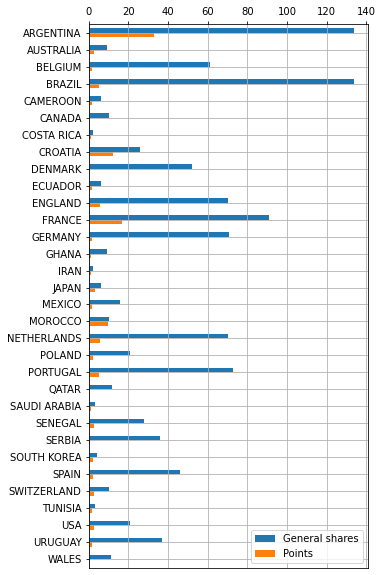

In [22]:
data = {'General shares': total_shares,
        'Points': points
       }

fig, ax = plt.subplots(facecolor='white')
df_bar = pd.DataFrame(data,columns=['General shares','Points'], index = teams)
df_bar.plot.barh(figsize=(5,10),ax = ax, color = (cmap(0),cmap(1)))
ax.invert_yaxis()
ax.xaxis.tick_top()
ax.legend(loc = 'lower right')
ax.grid()
plt.savefig(outdir + 'general_shares_points_team.png',bbox_inches='tight', dpi=1000)

In [23]:
f_res = open(outdir + 'points.txt','w')
f_res.write("{: <14} {: <1}\n".format('TEAM', 'POINTS'))
f_res.write("---------------------\n")

team_ranking = {}

for (team,team_score) in sorted(zip(teams,points), key=lambda x: x[1], reverse=True):
    f_res.write("{: <14} {: <1}\n".format(team, team_score))
    team_ranking[team] = team_score
    
f_res.close()

team_rankingMatrix = np.zeros((len(teams),2),dtype=object)
team_rankingMatrix[:,0] = list(team_ranking.keys())
team_rankingMatrix[:,1] = list(team_ranking.values())

res = pd.DataFrame(team_rankingMatrix, columns = ['<b>Team</b>', '<b>Points</b>'])
res.to_csv(outdir + 'points.csv', index = False) 

### Ranking

In [24]:
values_team = (points / total_shares).round(decimals = 3)

In [25]:
teams_general = []
teams_betting = []

for team in teams:
    teams_general.append('<a href=\"https://naiimic.github.io/content/fantasyshares_game/teams_html/' + ''.join(strip_accents(team).lower().split()) + '_general.html\">' + team + '</a>')
    teams_betting.append('<a href=\"https://naiimic.github.io/content/fantasyshares_game/teams_html/' + ''.join(strip_accents(team).lower().split()) + '_betting.html\">' + team + '</a>')

general_contribution = list(zip(teams_general, total_shares.astype(int), points, values_team))
res = pd.DataFrame(general_contribution, columns = ['<b>Teams</b>', '<b>Shares</b>', '<b>Points</b>', '<b>Value</b>'])
res.to_csv(outdir + 'tmp_general_contribution.csv',index=False) 

text = open(outdir + "tmp_general_contribution.csv", "r")
text = ''.join([i for i in text]).replace('\"<a href=\"\"', '<a href=\"')
text = ''.join([i for i in text]).replace('\"\">', '\">')
text = ''.join([i for i in text]).replace('</a>\"', '</a>')
x = open(outdir + "general_contribution.csv","w")
x.writelines(text)
x.close()
os.remove(outdir + "tmp_general_contribution.csv")

In [26]:
general_ranking = dict(zip(players,np.nansum(values_team * shares.T,axis=1).round(decimals=3)))
general_ranking = dict(sorted(general_ranking.items(), key=operator.itemgetter(1),reverse=True))

In [27]:
len(general_ranking)

109

In [28]:
general_ranking_Matrix = np.zeros((len(players),2),dtype=object)
general_ranking_Matrix[:,0] = list(general_ranking.keys())
general_ranking_Matrix[:,1] = list(general_ranking.values())

# np.savetxt(outdir + "general_ranking.txt", general_ranking_Matrix, delimiter=" ", fmt="%s") 

In [29]:
loc_dt = datetime.now(pytz.timezone('US/Eastern'))
fmt = '%d-%m-%Y %H:%M:%S, UTC%z'
changetime = loc_dt.strftime(fmt)
changetime

'06-02-2023 19:25:53, UTC-0500'

### Create CSV per player, including their points

In [30]:
'''
    Function to create csv for all the players, showing their squad. A team will be "striked" if is no longer in the tournament
'''

html_dir = './players_html/'
originalfile = 'template.html'

for player in players:

    idx = players.index(player)
    values = shares[:,idx]
    choices = []
    
    teams_points_players = []

    for i,x in enumerate(values):
        if x == 0:
            continue
        for j in range(int(x)):
            if teams[i] in eliminated_teams:
                # choices.append('<span style=\"color: red;\">' + teams[i] + '</span>')
                # choices.append('<span><strike>' + teams[i] + '</strike></span>')
                # choices.append('<span style=\"-webkit-text-decoration: line-through; text-decoration: line-through; -webkit-text-decoration-thickness: 1.5px; text-decoration-thickness: 1.5px; -webkit-text-decoration-color: red; text-decoration-color: red;\">' + teams[i] + '</span>')
                choices.append(teams[i])
            elif teams[i] in third_place:
                choices.append('<span style=\"color: brown;\"><b>' + teams[i] + '</b></span>') # bronze
            elif teams[i] in second_place:
                choices.append('<span style=\"color: silver;\"><b>' + teams[i] + '</b></span>') # silver
            elif teams[i] in first_place:
                choices.append('<span style=\"color: gold;\"><b>' + teams[i] + '</b></span>') # gold
            else:
                choices.append(teams[i])
            teams_points_players.append(int(general_contribution[i][3] * multiply_by_number))

    res = pd.DataFrame(list(zip(choices, teams_points_players)), columns = ['<b>Team</b>', '<b>Points</b>'])
    res.index += 1

    res.to_csv(outpath + ''.join(strip_accents(player).lower().split()) + '_tmp_general.csv') 
    text = open(outpath + ''.join(strip_accents(player).lower().split()) + '_tmp_general.csv', "r")
    text = ''.join([i for i in text]).replace('\"<span', '<span')
    text = ''.join([i for i in text]).replace('\"\"', '\"')
    text = ''.join([i for i in text]).replace('</span>\"', '</span>')

    x = open(outpath + ''.join(strip_accents(player).lower().split()) + '_general.csv',"w")
    x.writelines(text)
    x.close()
    os.remove(outpath + ''.join(strip_accents(player).lower().split()) + '_tmp_general.csv')

    namefile = html_dir + ''.join(strip_accents(player).lower().split()) + '_tmp.html'

    if not os.path.isfile(namefile):
        shutil.copy(originalfile,namefile)
        
        text = open(namefile, "r")
        text = ''.join([i for i in text]).replace('template_contribution', ''.join(strip_accents(player).lower().split()) + '_team_contribution_general')
        text = ''.join([i for i in text]).replace('template', ''.join(strip_accents(player).lower().split()) + '_general')
        text = ''.join([i for i in text]).replace('Template', player)
        x = open(namefile[:-9] + "_general.html","w")
        x.writelines(text)
        x.close()

        os.remove(namefile)

In [31]:
html_ranking = {}
multiply_by_number = 1000

for ik,key in enumerate(general_ranking):
    if general_ranking[key] > 0 and multiply_by_number == 1:
        html_ranking['<a href=\"https://naiimic.github.io/content/fantasyshares_game/players_html/' + ''.join(strip_accents(key).lower().split()) + '_general.html\">' + key + '</a>'] = '{0:.3f}'.format(general_ranking[key])
    elif general_ranking[key] > 0 and multiply_by_number > 1:
        html_ranking['<a href=\"https://naiimic.github.io/content/fantasyshares_game/players_html/' + ''.join(strip_accents(key).lower().split()) + '_general.html\">' + key + '</a>'] = int(general_ranking[key]*multiply_by_number)
    else:
        html_ranking['<a href=\"https://naiimic.github.io/content/fantasyshares_game/players_html/' + ''.join(strip_accents(key).lower().split()) + '_general.html\">' + key + '</a>'] = int(general_ranking[key])

htmlrankingMatrix = np.zeros((len(players),2),dtype=object)
htmlrankingMatrix[:,0] = list(html_ranking.keys())
htmlrankingMatrix[:,1] = list(html_ranking.values())

res = pd.DataFrame(htmlrankingMatrix, columns = ['<b>Name</b>', '<b>Points</b>'])
res.index += 1 
res = res.rename(index={1:'&#129351'})
res = res.rename(index={2:'&#129352'})
res = res.rename(index={3:'&#129353'})
res.to_csv(outdir + 'tmp_general_ranking.csv') 

text = open(outdir + "tmp_general_ranking.csv", "r")
text = ''.join([i for i in text]).replace('\"<a href=\"\"', '<a href=\"')
text = ''.join([i for i in text]).replace('\"\">', '\">')
text = ''.join([i for i in text]).replace('</a>\"', '</a>')
x = open(outdir + "general_ranking.csv","w")
x.writelines(text)
x.close()
os.remove(outdir + "tmp_general_ranking.csv")

#### Points per player

Text(0.5, 0, 'Games played in the World Cup')

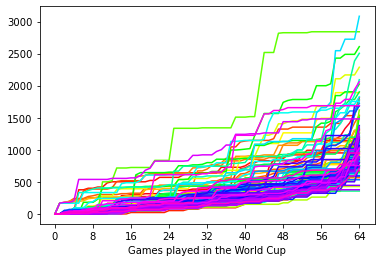

In [32]:
# General

fig = plt.figure()

nColors = len(players)

cm = plt.get_cmap('gist_rainbow')

ax = fig.add_subplot(111)
ax.set_prop_cycle(color=[cm(1.*i/nColors) for i in range(nColors)])

for i in range(nColors):
    if multiply_by_number > 1:
        ax.plot(np.arange(len(players_points[i,:])),(players_points[i,:]*multiply_by_number).astype(int), label = players[i])
    else:
        ax.plot(np.arange(len(players_points[i,:])),players_points[i,:], label = players[i])

#plt.plot(values_team * shares.T, label = teams);
# ax.legend(bbox_to_anchor=(1.05, 1.025), loc='upper left');
# ax.set_xticks(np.arange(len(df_res)+1))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_xlabel('Games played in the World Cup')

In [33]:
# General

for player in players:

    fig = plt.figure()

    for i,p in enumerate(players):
        if multiply_by_number > 1:
            if p == player:
                continue
            else:
                plt.plot(np.arange(len(players_points[i,:])),(players_points[i,:]*multiply_by_number).astype(int), color = 'silver')
        else:
            if p == player:
                continue
            else:
                plt.plot(np.arange(len(players_points[i,:])),players_points[i,:], color = 'silver')

    idxPlayer = players.index(player)
    if multiply_by_number > 1:
        plt.plot(np.arange(len(players_points[idxPlayer,:])),(players_points[idxPlayer,:]*multiply_by_number).astype(int), color = 'blue', linewidth = 2)
    else:
        plt.plot(np.arange(len(players_points[idxPlayer,:])),players_points[idxPlayer,:], color = 'blue', linewidth = 2)
    
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.xlabel('Games played in the World Cup')
    plt.ylabel('Points')
    plt.savefig(outpath + ''.join(strip_accents(player).lower().split()) + '_general.png', dpi = 400)
    plt.close(fig)

### Contribution of each team to the players

In [34]:
team_player = values_team * shares.T

Text(0.5, 1.0, 'General population')

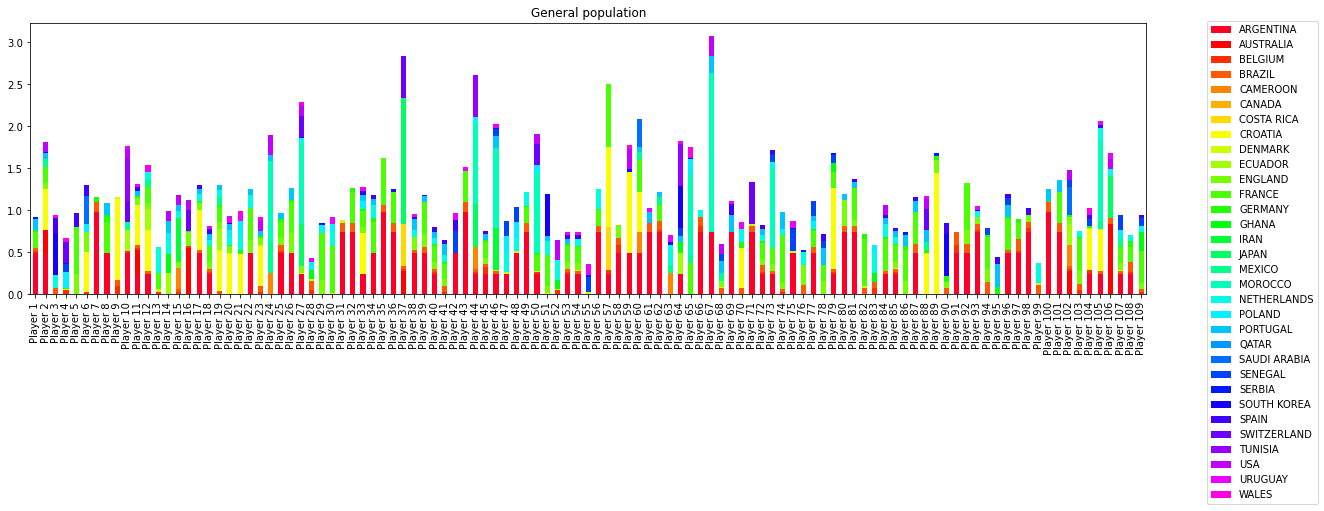

In [35]:
data = {}
df_bar = pd.DataFrame(data, index = players)

for i,x in enumerate(teams):
    df_bar[x] = team_player[:,i]

df_bar = df_bar.fillna(0)

nColors = len(teams)

df_bar.plot.bar(stacked=True, figsize = (20,5), color = [cm(1.*i/nColors) for i in range(nColors)])
plt.legend(bbox_to_anchor=(1.05, 1.025), loc='upper left')
plt.title('General population')

In [36]:
def export_legend(legend, filename="legend.png"):
    fig = legend.figure
    fig.canvas.draw()
    bbox = legend.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(filename, bbox_inches=bbox, dpi = 1000)

In [37]:
## Percentage contribution of each team to the score of each player

for pp,player in enumerate(players):

  nColors = len(teams)
  player_values = []

  for i,x in enumerate(teams):
    player_values.append(team_player[pp,i])

  player_values = np.array(player_values) 
  player_values = player_values / np.sum(player_values)

  p_values = (player_values*100).round()
  if p_values.sum() != 100:
    idx = np.random.choice(np.argwhere(p_values != 0).flatten())
    if p_values.sum() > 100:
        p_values[idx] -= 1
    else:
        p_values[idx] += 1

  mycolors = [cm(1.*i/nColors) for i in range(nColors)]
  actual_colors = []
  actual_teams = []
  actual_values = []
  for t,team in enumerate(teams):
    if p_values[t] == 0:
      continue
    actual_colors.append(mycolors[t])
    actual_teams.append(team)
    actual_values.append(p_values[t])

  fig, ax = plt.subplots(facecolor='white')
  plt.bar(actual_teams, height = actual_values, color = actual_colors)
  plt.ylabel('Percentage contribution')
  plt.xticks(rotation=45,ha='right')
  name = outpath + ''.join(strip_accents(player).lower().split()) + '_team_contribution_general.png'
  plt.savefig(name, bbox_inches='tight', dpi = 400)
  plt.close(fig)
  # export_legend(legend, filename= name)

In [38]:
# ## Percentage contribution of each team to the score of each player

# for pp,player in enumerate(players):

#   nColors = len(teams)
#   player_values = []

#   for i,x in enumerate(teams):
#     player_values.append(team_player[pp,i])

#   player_values = np.array(player_values) 
#   player_values = player_values / np.sum(player_values)

#   p_values = (player_values*100).round()
#   if p_values.sum() != 100:
#     idx = np.random.choice(np.argwhere(p_values != 0).flatten())
#     if p_values.sum() > 100:
#         p_values[idx] -= 1
#     else:
#         p_values[idx] += 1

#   data = {}
#   for t,team in enumerate(teams):
#     data[team] = p_values[t]

#   df = pd.DataFrame(data, index=[player])

#   mycolors = [cm(1.*i/nColors) for i in range(nColors)] #set color palette with seaborn colors
#   f, ax1 = plt.subplots(figsize = (20,2), facecolor='white')
#   f.subplots_adjust(bottom=0.5)
#   bot_array = [] #need this for representing values already plotted
#   labels = df.columns.values.tolist() #get labels from column names

#   #Create base bar separately because it doesn't require 'bottom' value
#   col = df.iloc[:,0].to_list()
#   if float(0) in col:
#     ax1.barh(range(len(col)), col, height = 1, label="", color=mycolors[0])
#     bot_array = np.array(col)
#   else:
#     ax1.barh(range(len(col)), col, height = 1, label=labels[0], color=mycolors[0])
#     bot_array = np.array(col)

#   #Loop over dataframe and add each column as a new colored bar with label only if there are no zero values in that column
#   for i in range(1,len(df.columns)):
#     cur_color = mycolors[i]
#     col = df.iloc[:,i].to_list()
#     if float(0) in col:
#       ax1.barh(range(len(col)), col, height = 1, left=bot_array, label="", color=mycolors[i])
#       bot_array = np.array(col)+bot_array
#     else:
#       ax1.barh(range(len(col)), col, height = 1, left=bot_array, label=labels[i], color=mycolors[i])
#       bot_array = np.array(col)+bot_array

#   legend = plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, ncol=len(np.argwhere(p_values != 0).flatten()), fontsize=12)
#   name = outpath + ''.join(strip_accents(player).lower().split()) + '_team_contribution_general.png'
#   # plt.axis('off')
#   plt.tick_params(labelleft=False, left=False, labelsize=12)
#   # ax1.set_xlabel('Percentage')
#   ax1.set_xlim([0,100])
#   ax1.xaxis.tick_top()
#   plt.savefig(name, bbox_inches='tight', dpi = 1000)
#   plt.close()
#   # export_legend(legend, filename= name)

In [39]:
# p_values = (player_values*100).round()
# if p_values.sum() != 100:
#     idx = np.random.choice(np.argwhere(p_values != 0).flatten())
#     if p_values.sum() > 100:
#         p_values[idx] -= 1
#     else:
#         p_values[idx] += 1

# name_style = "height:30px; background: -webkit-linear-gradient(left,"
# current_percentage = 0

# for i in range(nColors):
#     if p_values[i] == 0:
#         continue
#     c = cm(1.*i/nColors)
#     new_c = []
#     for cc in c[:-1]:
#         new_c.append(int(cc*255))
#     new_c.append(1)
#     new_c = tuple(new_c)
#     name_style += 'rgba' + str(new_c) + ' ' + str(int(current_percentage)) + '%,'
#     current_percentage += p_values[i]
#     name_style += 'rgba' + str(new_c) + ' ' + str(int(current_percentage)) + '%,'

# name_style = name_style[:-1] + ");"
# name_style

### People against naive players

In [40]:
def parts( n, k, arr ):
    if k == len(arr):
        if n>0:
            return []
        else:
            return [arr.copy()]
    pts =[]
    for ii in range( min(n,4)+1 ):
        arr[k] = ii
        pts.extend( parts(n-ii, k+1, arr ) )
    return pts

In [41]:
# All possible combinations

# combinations = parts(10,0,[0]*32)
# nc = np.array(combinations, dtype=int)

nc = []

for i in range(len(players)):

    prob = 1 / len(teams)
    idiot_team = np.zeros(len(teams))

    while np.sum(idiot_team) != 10:
        idx = np.random.randint(len(idiot_team))
        while idiot_team[idx] == 4:
            idx = np.random.randint(len(idiot_team))
        if np.random.rand() < prob:
            idiot_team[idx] += 1

    nc.append(idiot_team)

nc = np.array(nc)

In [42]:
N_idiots = len(players)
everybody_players = players.copy()

for i in range(N_idiots):
    everybody_players.append('Idiot %d' %(i+1))
    
# idxIdiots = []
# idxIdiots = np.random.randint(len(nc), size = N_idiots)
# idiots_shares = nc[idxIdiots]

idiots_shares = nc[:]
idiots_shares = idiots_shares.T

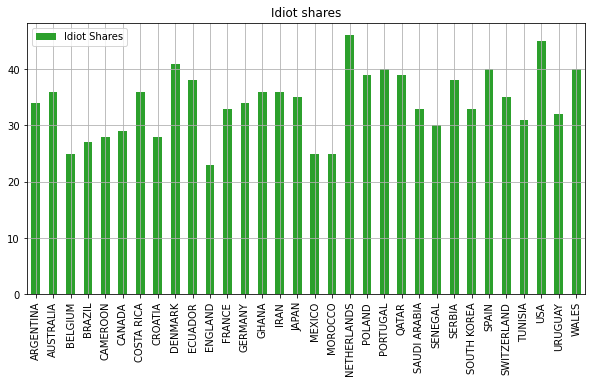

In [43]:
i_shares = np.sum(idiots_shares,axis = 1)

data = {'Idiot Shares': i_shares,
       }

fig, ax = plt.subplots(facecolor='white')
cmap = plt.get_cmap("tab10")
df_bar = pd.DataFrame(data,columns=['Idiot Shares'], index = teams)
df_bar.plot.bar(figsize=(10,5), title = 'Idiot shares', color = cmap(2), ax = ax)
ax.grid()

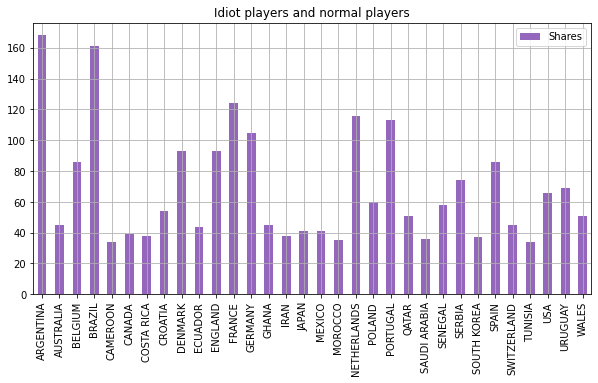

In [44]:
everybody_shares = np.hstack((shares,idiots_shares))

total_everybody_shares = np.sum(everybody_shares,axis = 1)

data = {'Shares': total_everybody_shares}

fig, ax = plt.subplots(facecolor='white')
cmap = plt.get_cmap("tab10")
df_bar = pd.DataFrame(data,columns=['Shares'], index = teams)
df_bar.plot.bar(figsize=(10,5), title = 'Idiot players and normal players', color = cmap(4), ax = ax)
ax.grid()

In [45]:
points, eliminated_teams, third_place, second_place, first_place, everybody_players_points = compute_points(df_res,players=everybody_players,total_shares=total_everybody_shares,shares=everybody_shares,print_scores=False)

In [46]:
everybody_players_points.shape

(218, 65)

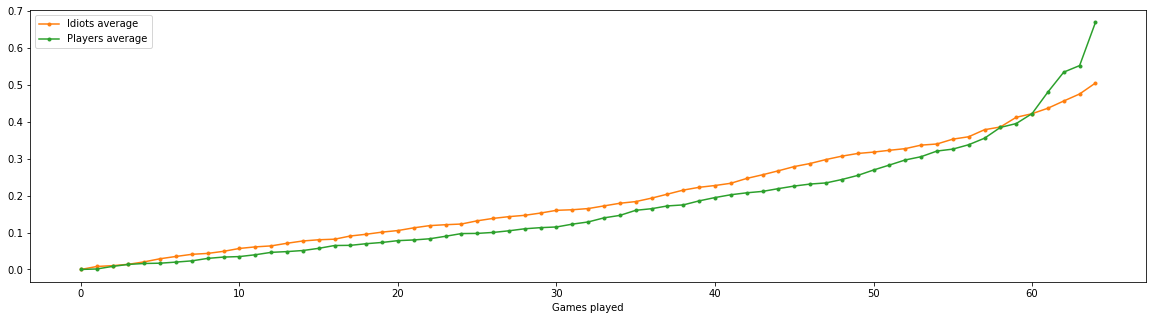

In [47]:
fig = plt.figure(figsize = (20,5))

cmap = plt.get_cmap("tab10")

plt.plot(np.mean(everybody_players_points[len(players):,:],axis = 0),'.-',label = 'Idiots average', color = cmap(1))
plt.plot(np.mean(everybody_players_points[:len(players),:],axis = 0),'.-',label = 'Players average', color = cmap(2))
plt.xlabel('Games played')
plt.legend()

In [48]:
everybody_values_team = points / total_everybody_shares
everybody_points = np.nansum(everybody_values_team * everybody_shares.T,axis=1).round(decimals=3)
everybody_ranking = dict(zip(everybody_players,everybody_points))
everybody_ranking = dict(sorted(everybody_ranking.items(), key=operator.itemgetter(1),reverse=True))

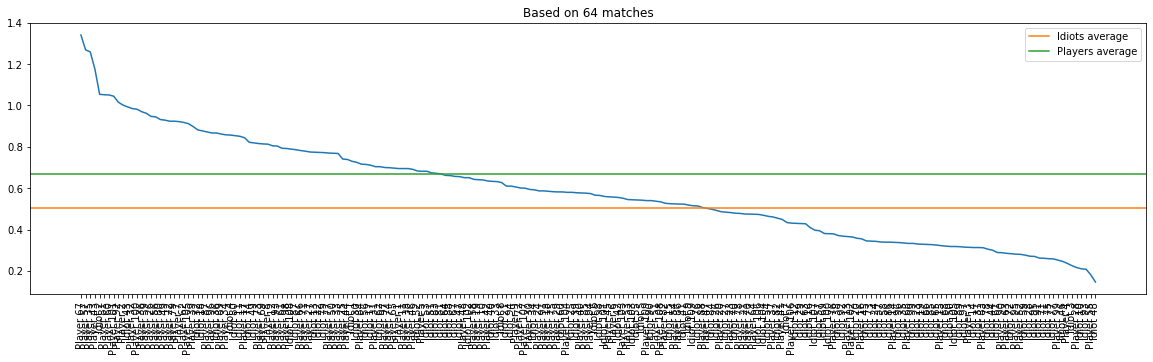

In [49]:
x, y = zip(*everybody_ranking.items()) # unpack a list of pairs into two tuples

fig, ax = plt.subplots(figsize = (20,5))

cmap = plt.get_cmap("tab10")

ax.plot(x, y)
ax.axhline(np.mean(everybody_points[len(players):]), color = cmap(1), label = 'Idiots average')
ax.axhline(np.mean(everybody_points[:len(players)]), color = cmap(2), label = 'Players average')
ax.set_xticklabels(x, rotation=90);
ax.set_title('Based on %s matches' %(len(df_res)))
ax.legend()

### Game theory question

Given the results of the game and the World Cup matches, if you could play again, where would you invest your shares knowing that everyone can create again their team?

In [50]:
teams = ['Qatar', 'Ecuador', 'Senegal', 'Netherlands', 'England', 'Iran', 'USA', 'Wales', 'Argentina', 'Saudi Arabia', 'Mexico', 'Poland', 'France', 'Australia', 'Denmark', 'Tunisia', 'Spain', 'Costa Rica', 'Germany', 'Japan', 'Belgium', 'Canada', 'Morocco', 'Croatia', 'Brazil', 'Serbia', 'Switzerland', 'Cameroon', 'Portugal', 'Ghana', 'Uruguay', 'South Korea']
teams.sort()
teams = list(map(str.upper,teams))
teams = np.array(teams)
teams

array(['ARGENTINA', 'AUSTRALIA', 'BELGIUM', 'BRAZIL', 'CAMEROON',
       'CANADA', 'COSTA RICA', 'CROATIA', 'DENMARK', 'ECUADOR', 'ENGLAND',
       'FRANCE', 'GERMANY', 'GHANA', 'IRAN', 'JAPAN', 'MEXICO', 'MOROCCO',
       'NETHERLANDS', 'POLAND', 'PORTUGAL', 'QATAR', 'SAUDI ARABIA',
       'SENEGAL', 'SERBIA', 'SOUTH KOREA', 'SPAIN', 'SWITZERLAND',
       'TUNISIA', 'USA', 'URUGUAY', 'WALES'], dtype='<U12')

In [51]:
after_users = pd.read_csv('users_game_theory.csv')
after_users = after_users.iloc[: , 1:]
after_players = after_users['name'].tolist()
after_users.head(5)

,name,share1,share10,share2,share3,share4,share5,share6,share7,share8,share9
0,Player 26,ARGENTINA,MOROCCO,FRANCE,BRAZIL,CROATIA,MOROCCO,NETHERLANDS,NETHERLANDS,NETHERLANDS,CROATIA
1,Player 72,ARGENTINA,PORTUGAL,FRANCE,CROATIA,MOROCCO,ENGLAND,NETHERLANDS,BRAZIL,PORTUGAL,PORTUGAL
2,Player 89,POLAND,ARGENTINA,POLAND,MOROCCO,MOROCCO,MOROCCO,JAPAN,JAPAN,SOUTH KOREA,ARGENTINA
3,Player 86,CROATIA,BRAZIL,JAPAN,JAPAN,MOROCCO,FRANCE,ENGLAND,PORTUGAL,ARGENTINA,ARGENTINA
4,Player 28,IRAN,MOROCCO,POLAND,ARGENTINA,ARGENTINA,ARGENTINA,JAPAN,JAPAN,FRANCE,CROATIA


In [52]:
after_shares = []

for index, row in after_users.iterrows():
    shares_player = np.zeros(len(teams))
    for share in range(1,11):
        shares_player[np.argwhere(teams == row['share' + str(share)]).item()] += 1
    after_shares.append(shares_player.tolist())

after_shares = np.array(after_shares).T
after_shares.shape

(32, 51)

In [53]:
after_total_shares = np.sum(after_shares,axis = 1)
points, eliminated_teams, third_place, second_place, first_place, after_players_points = compute_points(df_res,players=after_players,total_shares=after_total_shares,shares=after_shares)

In [54]:
points

array([33. ,  2.5,  1.5,  5. ,  1.5,  0. ,  1. , 12.5,  0.5,  1.5,  5.5,
       17. ,  1.5,  1. ,  1. ,  3. ,  1.5,  9.5,  5.5,  2. ,  5. ,  0. ,
        1. ,  2.5,  0.5,  2. ,  2. ,  2.5,  1.5,  2.5,  1.5,  0.5])

In [55]:
after_values_team = (points / after_total_shares).round(decimals = 3)
after_values_team[np.isnan(after_values_team)] = 0

after_general_ranking = dict(zip(after_players,np.nansum(after_values_team * after_shares.T,axis=1).round(decimals=3)))
after_general_ranking = dict(sorted(after_general_ranking.items(), key=operator.itemgetter(1),reverse=True)) 

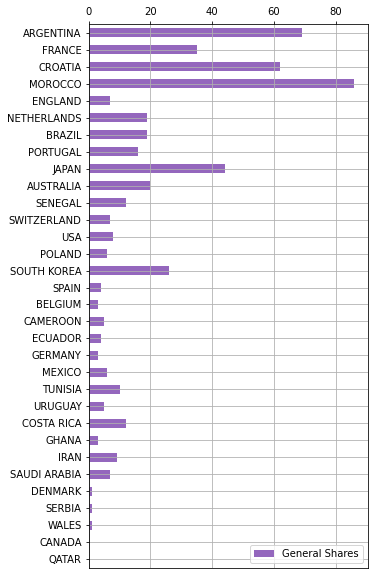

In [56]:
a = zip(teams, points, after_total_shares)
a = sorted(a, key=lambda x: x[1], reverse=True)

data = {'General Shares': [item[2] for item in a],
       }

fig, ax = plt.subplots(facecolor='white')
df_bar = pd.DataFrame(data,columns=['General Shares'], index = [item[0] for item in a])
df_bar.plot.barh(figsize=(5,10),ax = ax, color = cmap(4))
ax.invert_yaxis()
ax.xaxis.tick_top()
ax.legend(loc = 'lower right')
ax.grid()
plt.savefig(outdir + 'general_shares_after.png',bbox_inches='tight', dpi=1000)

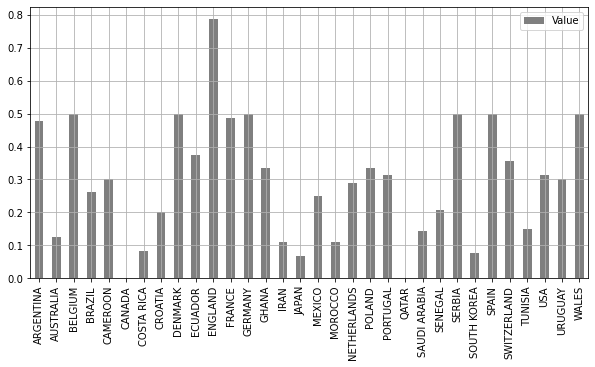

In [57]:
data = {'Value' : points / after_total_shares
       }

fig, ax1 = plt.subplots(facecolor='white')
df_bar = pd.DataFrame(data,columns=['Value'], index = teams)
df_bar.plot.bar(figsize=(10,5),ax = ax1, color = cmap(7))
ax1.grid()

In [58]:
## Percentage contribution of each team to the score of each player

team_player_after = after_values_team * after_shares.T

for pp,player in enumerate(after_players):

  nColors = len(teams)
  player_values = []

  for i,x in enumerate(teams):
    player_values.append(team_player_after[pp,i])

  player_values = np.array(player_values) 
  player_values = player_values / np.sum(player_values)

  p_values = (player_values*100).round()
  if p_values.sum() != 100:
    idx = np.random.choice(np.argwhere(p_values != 0).flatten())
    if p_values.sum() > 100:
        p_values[idx] -= 1
    else:
        p_values[idx] += 1

  mycolors = [cm(1.*i/nColors) for i in range(nColors)]
  actual_colors = []
  actual_teams = []
  actual_values = []
  for t,team in enumerate(teams):
    if p_values[t] == 0:
      continue
    actual_colors.append(mycolors[t])
    actual_teams.append(team)
    actual_values.append(p_values[t])

  fig, ax = plt.subplots(facecolor='white')
  plt.bar(actual_teams, height = actual_values, color = actual_colors)
  plt.ylabel('Percentage contribution')
  plt.xticks(rotation=45,ha='right')
  name = outpath + ''.join(strip_accents(player).lower().split()) + '_team_contribution_general_after.png'
  plt.savefig(name, bbox_inches='tight', dpi = 400)
  plt.close(fig)
  # export_legend(legend, filename= name)

In [59]:
html_ranking = {}
multiply_by_number = 1000

for ik,key in enumerate(after_general_ranking):
    if after_general_ranking[key] > 0 and multiply_by_number == 1:
        html_ranking['<a href=\"https://naiimic.github.io/content/fantasyshares_game/players_html/' + ''.join(strip_accents(key).lower().split()) + '_general_after.html\">' + key + '</a>'] = '{0:.3f}'.format(general_ranking[key])
    elif after_general_ranking[key] > 0 and multiply_by_number > 1:
        html_ranking['<a href=\"https://naiimic.github.io/content/fantasyshares_game/players_html/' + ''.join(strip_accents(key).lower().split()) + '_general_after.html\">' + key + '</a>'] = int(after_general_ranking[key]*multiply_by_number)
    else:
        html_ranking['<a href=\"https://naiimic.github.io/content/fantasyshares_game/players_html/' + ''.join(strip_accents(key).lower().split()) + '_general_after.html\">' + key + '</a>'] = int(after_general_ranking[key])

htmlrankingMatrix = np.zeros((len(after_players),2),dtype=object)
htmlrankingMatrix[:,0] = list(html_ranking.keys())
htmlrankingMatrix[:,1] = list(html_ranking.values())

res = pd.DataFrame(htmlrankingMatrix, columns = ['<b>Name</b>', '<b>Points</b>'])
res.index += 1 
res = res.rename(index={1:'&#129351'})
res.to_csv(outdir + 'tmp_after_general_ranking.csv') 

text = open(outdir + "tmp_after_general_ranking.csv", "r")
text = ''.join([i for i in text]).replace('\"<a href=\"\"', '<a href=\"')
text = ''.join([i for i in text]).replace('\"\">', '\">')
text = ''.join([i for i in text]).replace('</a>\"', '</a>')
x = open(outdir + "general_ranking_after.csv","w")
x.writelines(text)
x.close()
os.remove(outdir + "tmp_after_general_ranking.csv")

In [60]:
teams_general_after = []

for team in teams:
    teams_general_after.append('<a href=\"https://naiimic.github.io/content/fantasyshares_game/teams_html/' + ''.join(strip_accents(team).lower().split()) + '_general_after.html\">' + team + '</a>')

general_contribution = list(zip(teams_general, after_total_shares.astype(int), points, after_values_team))
res = pd.DataFrame(general_contribution, columns = ['<b>Teams</b>', '<b>Shares</b>', '<b>Points</b>', '<b>Value</b>'])
res.to_csv(outdir + 'tmp_general_contribution_after.csv',index=False) 

text = open(outdir + "tmp_general_contribution_after.csv", "r")
text = ''.join([i for i in text]).replace('\"<a href=\"\"', '<a href=\"')
text = ''.join([i for i in text]).replace('\"\">', '\">')
text = ''.join([i for i in text]).replace('</a>\"', '</a>')
x = open(outdir + "general_contribution_after.csv","w")
x.writelines(text)
x.close()
os.remove(outdir + "tmp_general_contribution_after.csv")

In [61]:
'''
    Function to create csv for all the players, showing their squad. A team will be "striked" if is no longer in the tournament
'''

html_dir = './players_html/'
originalfile = 'template.html'

for player in after_players:

    idx = after_players.index(player)
    values = after_shares[:,idx]
    choices = []
    
    teams_points_players = []

    for i,x in enumerate(values):
        if x == 0:
            continue
        for j in range(int(x)):
            if teams[i] in eliminated_teams:
                # choices.append('<span style=\"color: red;\">' + teams[i] + '</span>')
                # choices.append('<span><strike>' + teams[i] + '</strike></span>')
                # choices.append('<span style=\"-webkit-text-decoration: line-through; text-decoration: line-through; -webkit-text-decoration-thickness: 1.5px; text-decoration-thickness: 1.5px; -webkit-text-decoration-color: red; text-decoration-color: red;\">' + teams[i] + '</span>')
                choices.append(teams[i])
            elif teams[i] in third_place:
                choices.append('<span style=\"color: brown;\"><b>' + teams[i] + '</b></span>') # bronze
            elif teams[i] in second_place:
                choices.append('<span style=\"color: silver;\"><b>' + teams[i] + '</b></span>') # silver
            elif teams[i] in first_place:
                choices.append('<span style=\"color: gold;\"><b>' + teams[i] + '</b></span>') # gold
            else:
                choices.append(teams[i])
            teams_points_players.append(int(general_contribution[i][3] * multiply_by_number))

    res = pd.DataFrame(list(zip(choices, teams_points_players)), columns = ['<b>Team</b>', '<b>Points</b>'])
    res.index += 1

    res.to_csv(outpath + ''.join(strip_accents(player).lower().split()) + '_tmp_general.csv') 
    text = open(outpath + ''.join(strip_accents(player).lower().split()) + '_tmp_general.csv', "r")
    text = ''.join([i for i in text]).replace('\"<span', '<span')
    text = ''.join([i for i in text]).replace('\"\"', '\"')
    text = ''.join([i for i in text]).replace('</span>\"', '</span>')

    x = open(outpath + ''.join(strip_accents(player).lower().split()) + '_general_after.csv',"w")
    x.writelines(text)
    x.close()
    os.remove(outpath + ''.join(strip_accents(player).lower().split()) + '_tmp_general.csv')

    namefile = html_dir + ''.join(strip_accents(player).lower().split()) + '_tmp.html'

    if not os.path.isfile(namefile):
        shutil.copy(originalfile,namefile)
        
        text = open(namefile, "r")
        text = ''.join([i for i in text]).replace('template_contribution', ''.join(strip_accents(player).lower().split()) + '_team_contribution_general_after')
        text = ''.join([i for i in text]).replace('template', ''.join(strip_accents(player).lower().split()) + '_general_after')
        text = ''.join([i for i in text]).replace('<p>Performance of this player (in blue) against other players (in grey).</p>', '')
        text = ''.join([i for i in text]).replace('<p><img border="2" class="post-images" alt="" src="https://naiimic.github.io/content/fantasyshares_game/analysis/players/' + ''.join(strip_accents(player).lower().split()) + '_general_after.png"></p>', '')
        text = ''.join([i for i in text]).replace('Template', player)
        x = open(namefile[:-9] + "_general_after.html","w")
        x.writelines(text)
        x.close()

        os.remove(namefile)